In [1]:
# import dependencies
%matplotlib notebook
from random import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

In [2]:
# read weather data csv 
ncdc_file = pd.read_csv("Weather_Data_NCDC.csv")
ncdc_file.head()

,Location ID,Location,Date (Year Month),Value in F,Rank,1901-2000 Mean in F,Anomaly (1901-2000 base period)
0,100,Alabama,189501,43.1,40,45.1,-2.0
1,100,Alabama,189502,37.4,1,48.0,-10.6
2,100,Alabama,189503,54.5,55,55.1,-0.6
3,100,Alabama,189504,63.4,73,62.8,0.6
4,100,Alabama,189505,69.5,37,70.7,-1.2


In [3]:
# check data csv for incomplete data
ncdc_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71808 entries, 0 to 71807
Data columns (total 7 columns):
Location ID                        71808 non-null int64
Location                           71808 non-null object
Date (Year Month)                  71808 non-null int64
Value in F                         71808 non-null float64
Rank                               71808 non-null int64
1901-2000 Mean in F                71808 non-null float64
Anomaly (1901-2000 base period)    71808 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.8+ MB


In [4]:
# build df for only 2010 months January to December
ncdc_2010 = ncdc_file[(ncdc_file['Date (Year Month)'] >=201001) & (ncdc_file['Date (Year Month)'] <=201012)]
ncdc_2010

,Location ID,Location,Date (Year Month),Value in F,Rank,1901-2000 Mean in F,Anomaly (1901-2000 base period)
1380,100,Alabama,201001,40.0,15,45.1,-5.1
1381,100,Alabama,201002,40.6,7,48.0,-7.4
1382,100,Alabama,201003,51.2,17,55.1,-3.9
1383,100,Alabama,201004,64.2,90,62.8,1.4
1384,100,Alabama,201005,73.3,109,70.7,2.6
1385,100,Alabama,201006,80.9,120,77.5,3.4
1386,100,Alabama,201007,82.6,123,79.9,2.7
1387,100,Alabama,201008,83.0,123,79.3,3.7
1388,100,Alabama,201009,76.9,100,74.7,2.2
1389,100,Alabama,201010,64.3,71,63.9,0.4


In [5]:
# calculate mean of all means of state temperature 
mean_2010 = ncdc_2010["Value in F"].mean()

In [6]:
ncdc_2010_df = ncdc_2010[["Location", "Value in F", "Date (Year Month)"]]
ncdc_2010_df

,Location,Value in F,Date (Year Month)
1380,Alabama,40.0,201001
1381,Alabama,40.6,201002
1382,Alabama,51.2,201003
1383,Alabama,64.2,201004
1384,Alabama,73.3,201005
1385,Alabama,80.9,201006
1386,Alabama,82.6,201007
1387,Alabama,83.0,201008
1388,Alabama,76.9,201009
1389,Alabama,64.3,201010


In [7]:
# create dataframe for states by temperature 
ncdc_mean = pd.DataFrame(ncdc_2010_df.groupby(["Location"]).mean())
state_ascend = ncdc_mean.sort_values(['Value in F'], ascending=False)

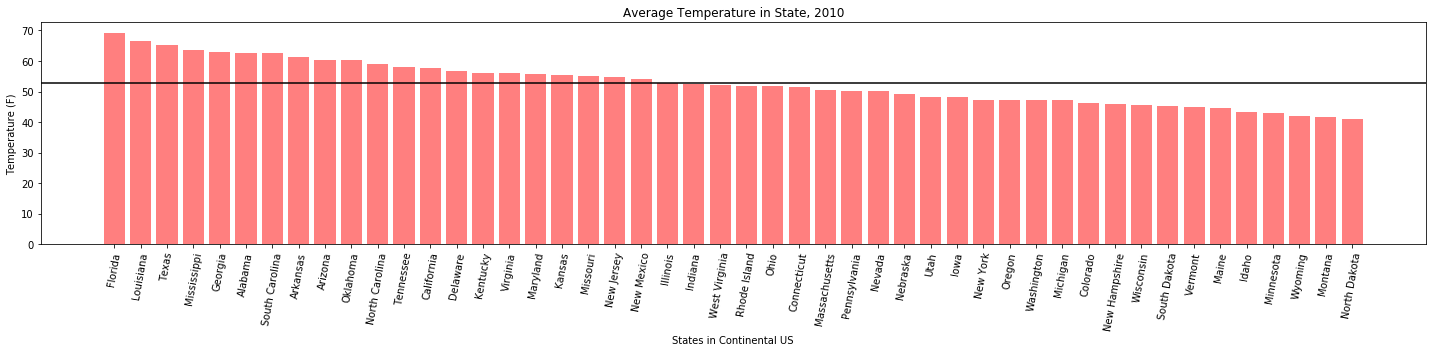

In [12]:
# build bar graph
x_axis = np.arange(len(state_ascend))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,5))
plt.title("Average Temperature in State, 2010")
plt.xlabel("States in Continental US")
plt.ylabel("Temperature (F)")
plt.bar(x_axis, state_ascend["Value in F"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, state_ascend.index, rotation="80")
plt.axhline(y=mean_2010, color = 'black')
plt.tight_layout()
plt.savefig("../SMU_Pro1_Team4_repo/Temperature_State_2010.png")
plt.show()

In [9]:
# create df for 2010 data in each state
cal_df = ncdc_2010_df.loc[ncdc_2010_df.Location=="California"]
was_df = ncdc_2010_df.loc[ncdc_2010_df.Location=="Washington"]
mon_df = ncdc_2010_df.loc[ncdc_2010_df.Location=="Montana"]
uta_df = ncdc_2010_df.loc[ncdc_2010_df.Location=="Utah"]
tex_df = ncdc_2010_df.loc[ncdc_2010_df.Location=="Texas"]
mic_df = ncdc_2010_df.loc[ncdc_2010_df.Location=="Michigan"]
ken_df = ncdc_2010_df.loc[ncdc_2010_df.Location=="Kentucky"]
flo_df = ncdc_2010_df.loc[ncdc_2010_df.Location=="Florida"]
new_df = ncdc_2010_df.loc[ncdc_2010_df.Location=="New Hampshire"]

In [10]:
%matplotlib inline

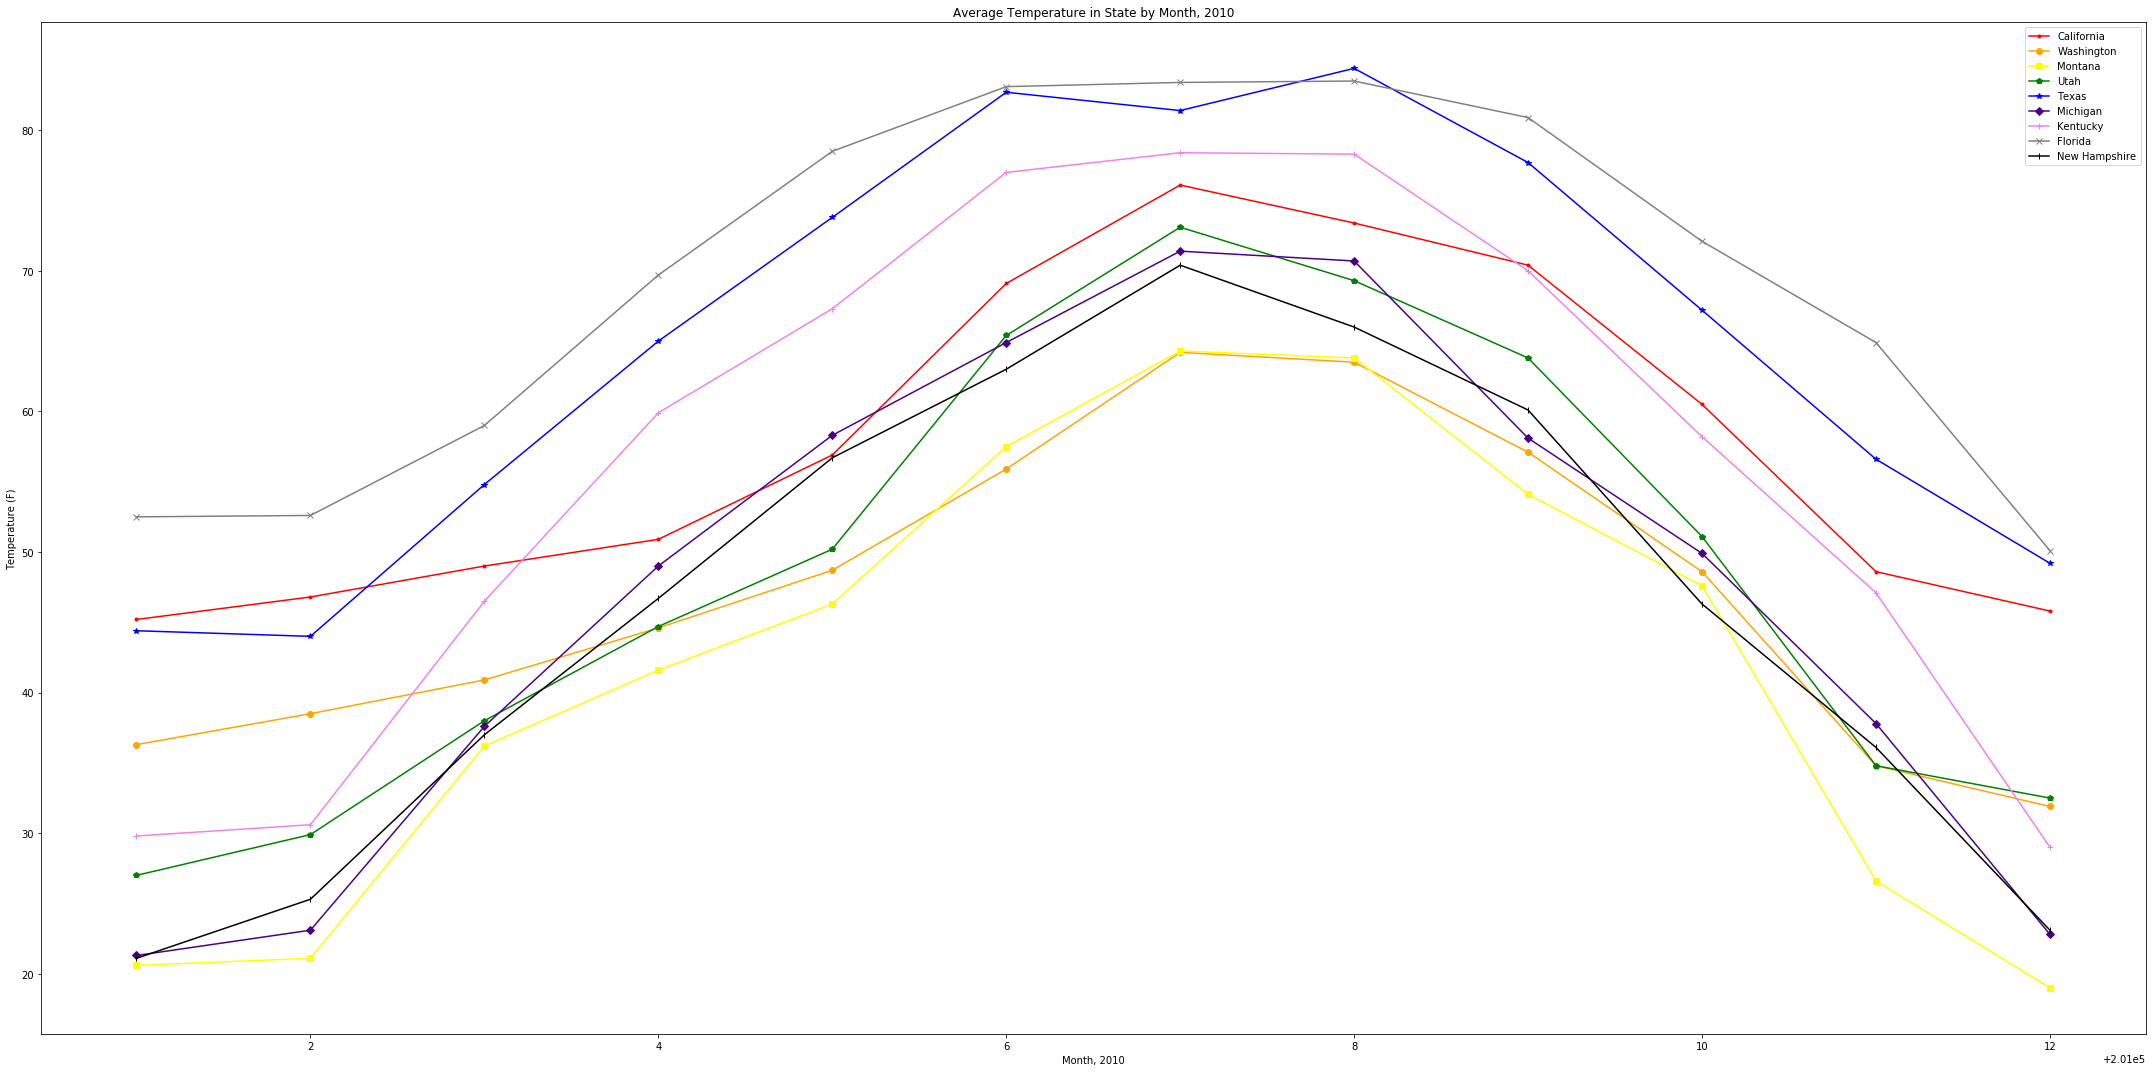

In [11]:
# build line series
plt.figure(figsize=(30,15))
plt.plot(cal_df["Date (Year Month)"], cal_df["Value in F"], marker=".", color="red", label="California")
plt.plot(was_df["Date (Year Month)"], was_df["Value in F"], marker="o", color="orange", label="Washington")
plt.plot(mon_df["Date (Year Month)"], mon_df["Value in F"], marker="s", color="yellow", label="Montana")
plt.plot(uta_df["Date (Year Month)"], uta_df["Value in F"], marker="p", color="green", label="Utah")
plt.plot(tex_df["Date (Year Month)"], tex_df["Value in F"], marker="*", color="blue", label="Texas")
plt.plot(mic_df["Date (Year Month)"], mic_df["Value in F"], marker="D", color="indigo", label="Michigan")
plt.plot(ken_df["Date (Year Month)"], ken_df["Value in F"], marker="+", color="violet", label="Kentucky")
plt.plot(flo_df["Date (Year Month)"], flo_df["Value in F"], marker="x", color="gray", label="Florida")
plt.plot(new_df["Date (Year Month)"], new_df["Value in F"], marker="|", color="black", label="New Hampshire")
plt.title("Average Temperature in State by Month, 2010")
plt.xlabel("Month, 2010")
plt.ylabel("Temperature (F)")
plt.legend(loc="best")
plt.show

plt.tight_layout()
plt.savefig("../SMU_Pro1_Team4_repo/Temperature_Month_2010.png")